In [1]:
# Import necessary libraries for data manipulation, machine learning, and visualization
import pandas as pd
import numpy as np
import bson
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Define the file path for the keyboard usage logs BSON file
keyboard_data_path='D:\mongofiles\data\mydatabase\keyboard_usage_logs.bson'

In [3]:
# Function to load multiple BSON objects from a file
def load_multiple_bson_objects(file_path):
    data = []
    with open(file_path, 'rb') as file:
        for document in bson.decode_all(file.read()):
            data.append(document)
    return data

In [4]:
# Load keyboard data from the BSON file.
keyboard_data = load_multiple_bson_objects(keyboard_data_path)

In [5]:
# Retrieve the keys of the first document in the keyboard data
keyboard_data[0].keys()

dict_keys(['_id', 'user_id', 'username', 'session_id', 'start_time', 'end_time', 'session_duration', 'events'])

In [6]:
# Process keyboard data from a list of dictionaries and concatenate them into one DataFrame
keyBoardDataList= []
for i in range(len(keyboard_data)):
    current_user = keyboard_data[i]['user_id']
    current_data_frame = pd.DataFrame(keyboard_data[i]['events'])
    current_data_frame['user_id'] = current_user
    keyBoardDataList.append(current_data_frame)

combined_df_keyboard = pd.concat(keyBoardDataList, ignore_index=True)
KeyBoardData = combined_df_keyboard.drop_duplicates()


In [7]:
KeyBoardData.shape

(1984, 4)

In [8]:
KeyBoardData.head()

,event,key,timestamp,user_id
0,press,l,2024-05-18 02:25:06.875,test_user_id
1,release,l,2024-05-18 02:25:07.085,test_user_id
2,press,d,2024-05-18 02:25:07.359,test_user_id
3,release,d,2024-05-18 02:25:07.528,test_user_id
4,press,k,2024-05-18 02:25:07.531,test_user_id


In [9]:
KeyBoardData['user_id'].unique()

array(['test_user_id', 'user_id', '66322d94f89c7cd14b365ea8',
       '66322d6df89c7cd14b365ea7', '66327fdb321870545078d205',
       '66403324c6d3b6e77f917976', '664942ebbe8bf4121a91913c'],
      dtype=object)

In [10]:
label_encoder = LabelEncoder()
KeyBoardData.loc[:, 'user_id'] = label_encoder.fit_transform(KeyBoardData['user_id'])

C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2097773166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData.loc[:, 'user_id'] = label_encoder.fit_transform(KeyBoardData['user_id'])
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2097773166.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  KeyBoardData.loc[:, 'user_id'] = label_encoder.fit_transform(KeyBoardData['user_id'])


In [11]:
KeyBoardData['user_id'].unique()

array([5, 6, 1, 0, 2, 3, 4])

In [12]:
# Set the 'timestamp' column as the index
KeyBoardData.set_index('timestamp', inplace=True)

In [13]:
KeyBoardData.head(15)

,event,key,user_id
timestamp,,,
2024-05-18 02:25:06.875,press,l,5
2024-05-18 02:25:07.085,release,l,5
2024-05-18 02:25:07.359,press,d,5
2024-05-18 02:25:07.528,release,d,5
2024-05-18 02:25:07.531,press,k,5
2024-05-18 02:25:07.648,release,k,5
2024-05-18 02:25:07.699,press,d,5
2024-05-18 02:25:07.733,press,k,5
2024-05-18 02:25:07.817,release,d,5


In [14]:
len(KeyBoardData['key'].unique())

53

In [15]:
KeyBoardData.loc[:, 'key'] = label_encoder.fit_transform(KeyBoardData['key'])
KeyBoardData.loc[:, 'event'] = label_encoder.fit_transform(KeyBoardData['event'])


C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3570637755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData.loc[:, 'key'] = label_encoder.fit_transform(KeyBoardData['key'])
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3570637755.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  KeyBoardData.loc[:, 'key'] = label_encoder.fit_transform(KeyBoardData['key'])
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3570637755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [16]:
KeyBoardData.columns

Index(['event', 'key', 'user_id'], dtype='object')

In [17]:
print("event uniques : \n ",KeyBoardData['event'].unique())
print("key uniques : \n ", KeyBoardData['key'].unique())
print("user_id uniques : \n ", KeyBoardData['user_id'].unique())

event uniques : 
  [0 1]
key uniques : 
  [41 33 40 39 30 35 26 47 11 27 15  4  1 20 42 38 32 46 36 37 12 13 48  8
 49 34 31 43 44 50  7 51 19 52 22  6 14 23 18 28 25 21 17 16  3  0 45 10
 24  5 29  9  2]
user_id uniques : 
  [5 6 1 0 2 3 4]


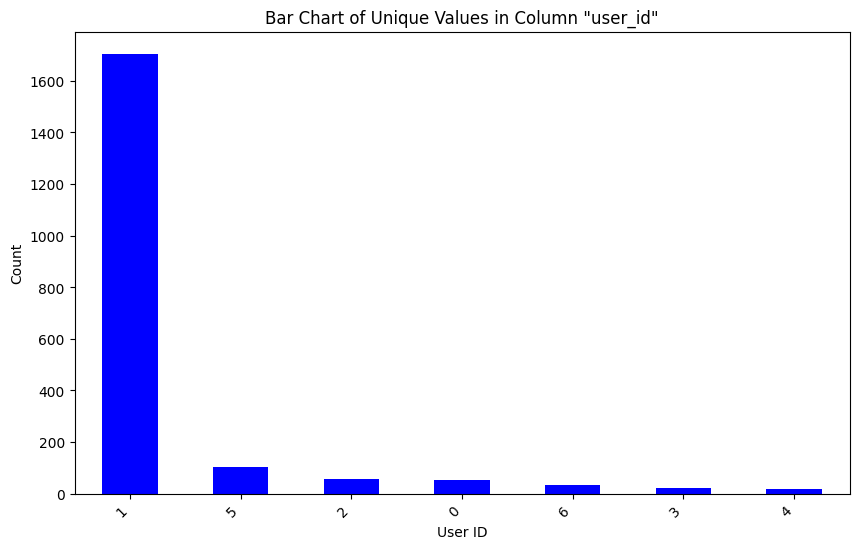

In [18]:
# Count unique values in 'user_id' column and plot a bar chart
unique_users = KeyBoardData['user_id'].value_counts()

plt.figure(figsize=(10, 6))
unique_users.plot.bar(color='blue')
plt.title('Bar Chart of Unique Values in Column "user_id"')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


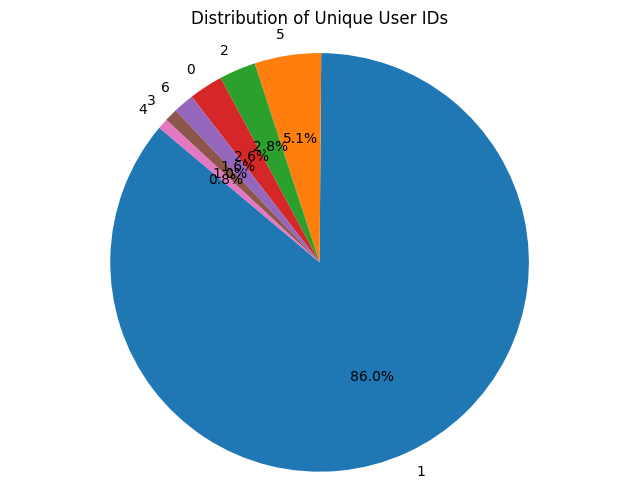

In [19]:
# Calculate the counts of unique values in the 'user_id' column
user_counts = KeyBoardData['user_id'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique User IDs')
plt.axis('equal')
plt.show()


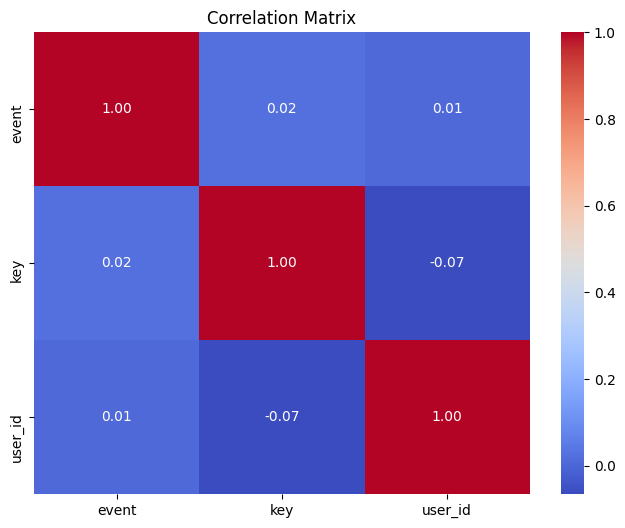

In [20]:
# Calculate the correlation matrix for the keyboard data
correlation_matrix = KeyBoardData.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


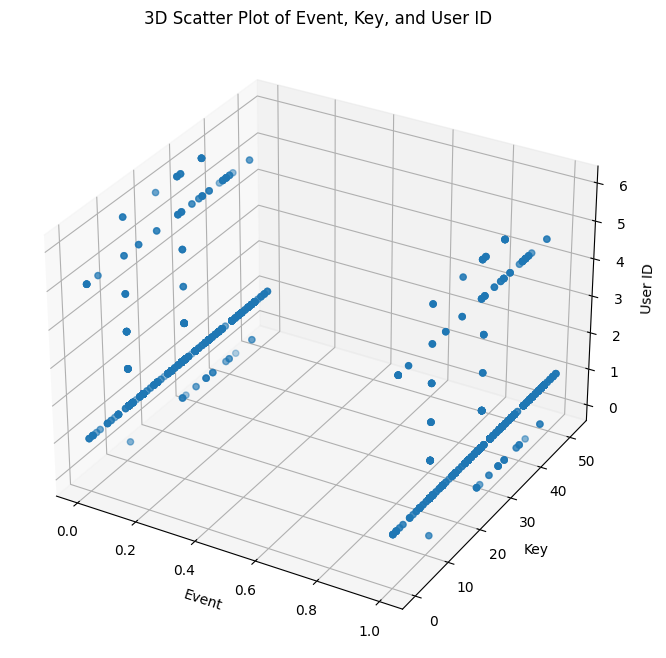

In [21]:
# Create a 3D scatter plot to visualize relationships between 'event', 'key', and 'user_id'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(KeyBoardData['event'], KeyBoardData['key'], KeyBoardData['user_id'])

ax.set_xlabel('Event')
ax.set_ylabel('Key')
ax.set_zlabel('User ID')
plt.title('3D Scatter Plot of Event, Key, and User ID')
plt.show()


In [22]:
# Extract time features
KeyBoardData.index = pd.to_datetime(KeyBoardData.index)  

KeyBoardData['hour'] = KeyBoardData.index.hour
KeyBoardData['day'] = KeyBoardData.index.day
KeyBoardData['month'] = KeyBoardData.index.month
KeyBoardData['milliseconds'] = KeyBoardData.index.microsecond // 1000  #



C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2939412134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['hour'] = KeyBoardData.index.hour
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2939412134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['day'] = KeyBoardData.index.day
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2939412134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [23]:
# Lagged features 
KeyBoardData['lagged_event'] = KeyBoardData['event'].shift(1)
KeyBoardData['lagged_key'] = KeyBoardData['key'].shift(1)

C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2243386477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['lagged_event'] = KeyBoardData['event'].shift(1)
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\2243386477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['lagged_key'] = KeyBoardData['key'].shift(1)


In [24]:
# Rolling statistics
KeyBoardData['rolling_mean_milliseconds'] = KeyBoardData['milliseconds'].rolling(window=5).mean()

C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\252832567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['rolling_mean_milliseconds'] = KeyBoardData['milliseconds'].rolling(window=5).mean()


In [25]:
# Calculate  moving averages for trend and seasonality
window_size = 24 * 60 
KeyBoardData['trend'] = KeyBoardData['event'].rolling(window=window_size, min_periods=1).mean()
KeyBoardData['seasonal'] = KeyBoardData['event'] - KeyBoardData['trend']
# Calculate residual
KeyBoardData['residual'] = KeyBoardData['event'] - (KeyBoardData['trend'] + KeyBoardData['seasonal'])


C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3827295515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['trend'] = KeyBoardData['event'].rolling(window=window_size, min_periods=1).mean()
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3827295515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['seasonal'] = KeyBoardData['event'] - KeyBoardData['trend']
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\3827295515.py:6: SettingWithCopyWarning: 
A value is trying to be s

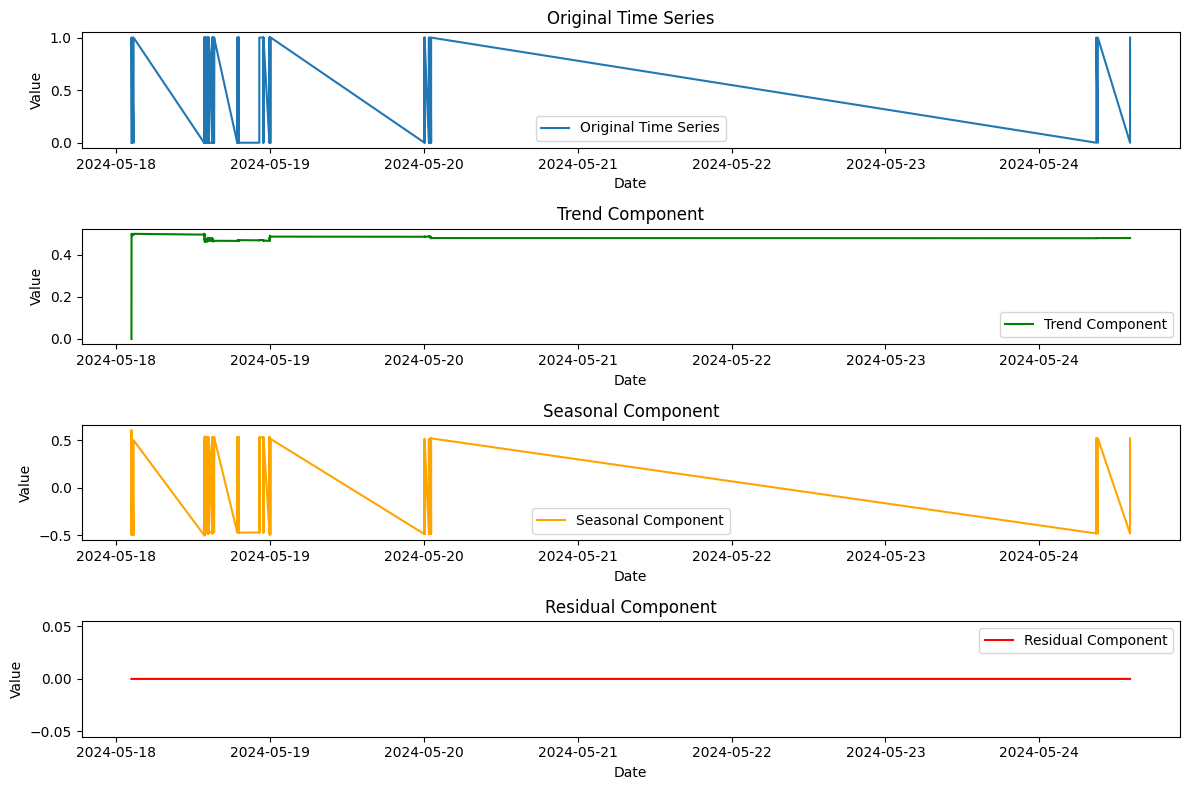

In [26]:
# Plot the time series and decomposition components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(KeyBoardData.index, KeyBoardData['event'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(KeyBoardData.index, KeyBoardData['trend'], label='Trend Component', color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(KeyBoardData.index, KeyBoardData['seasonal'], label='Seasonal Component', color='orange')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(KeyBoardData.index, KeyBoardData['residual'], label='Residual Component', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Extract Cyclical encoding for hour, day, month
KeyBoardData['hour_sin'] = np.sin(2 * np.pi * KeyBoardData['hour'] / 24)
KeyBoardData['hour_cos'] = np.cos(2 * np.pi * KeyBoardData['hour'] / 24)
KeyBoardData['day_sin'] = np.sin(2 * np.pi * KeyBoardData['day'] / 7)  
KeyBoardData['day_cos'] = np.cos(2 * np.pi * KeyBoardData['day'] / 7)
KeyBoardData['month_sin'] = np.sin(2 * np.pi * KeyBoardData['month'] / 12)  
KeyBoardData['month_cos'] = np.cos(2 * np.pi * KeyBoardData['month'] / 12)
# Drop original cyclical columns
KeyBoardData.drop(columns=['hour', 'day', 'month', 'milliseconds'], inplace=True)

C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\1572302338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['hour_sin'] = np.sin(2 * np.pi * KeyBoardData['hour'] / 24)
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\1572302338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KeyBoardData['hour_cos'] = np.cos(2 * np.pi * KeyBoardData['hour'] / 24)
C:\Users\MABCO\AppData\Local\Temp\ipykernel_14372\1572302338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [28]:
X = KeyBoardData.drop(columns=['user_id'])  # Features
y = KeyBoardData['user_id']  # Target


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [29]:
pipeline.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier(random_state=42))])

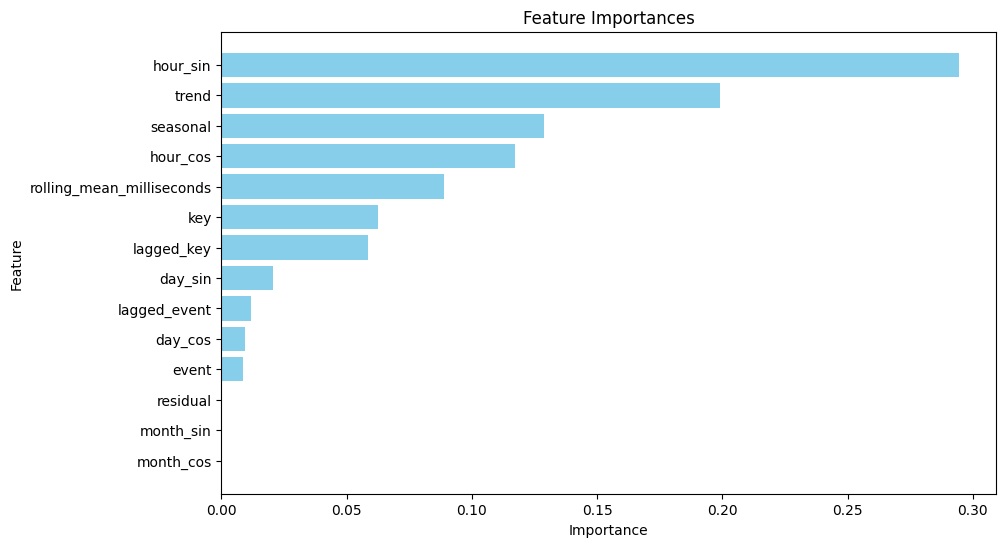

In [30]:
# Get feature importances
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [32]:
# Evaluation
y_pred = pipeline.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


F1 Score: 0.945530579884554
Confusion Matrix:
[[  6   4   0   0   0   0   0]
 [  1 340   0   0   0   0   0]
 [  0   2   7   0   0   0   0]
 [  0   5   0   3   0   0   0]
 [  0   2   0   0   1   0   0]
 [  0   0   0   0   0  18   4]
 [  0   0   0   0   0   2   2]]


In [33]:
# constructs sequences for each user, ensuring that sequences are user-specific
scaler = StandardScaler()
scaled_features = scaler.fit_transform(KeyBoardData[[ 
                                                      'hour_sin', 'hour_cos', 
                                                      'day_sin', 'day_cos', 'month_sin', 'month_cos'
                                                     ]])

event_encoder = OneHotEncoder(sparse=False)
event_encoded = event_encoder.fit_transform(KeyBoardData[['event']])
key_encoder = OneHotEncoder(sparse=False)
key_encoded = key_encoder.fit_transform(KeyBoardData[['key']])

lagged_event = KeyBoardData[['lagged_event']]
lagged_key = KeyBoardData[['lagged_key']]
trend = KeyBoardData[['trend']]
seasonal = KeyBoardData[['seasonal']]
residual = KeyBoardData[['residual']]

combined_features = np.hstack([scaled_features, event_encoded, key_encoded, lagged_event, lagged_key, trend, seasonal, residual])

KeyBoardData.reset_index(drop=True, inplace=True)
feature_columns = [f'feature_{i}' for i in range(combined_features.shape[1])]
combined_features_df = pd.DataFrame(combined_features, columns=feature_columns)
KeyBoardData = pd.concat([KeyBoardData[['user_id']], combined_features_df], axis=1)

sequence_length = 10

sequences = []
targets = []

for user_id, group in KeyBoardData.groupby('user_id'):
    X_user = group.drop('user_id', axis=1).values
    for i in range(len(X_user) - sequence_length + 1):
        sequence = X_user[i:i+sequence_length]
        target = user_id
        sequences.append(sequence)
        targets.append(target)

X = np.array(sequences)
y = np.array(targets)

In [34]:
#END